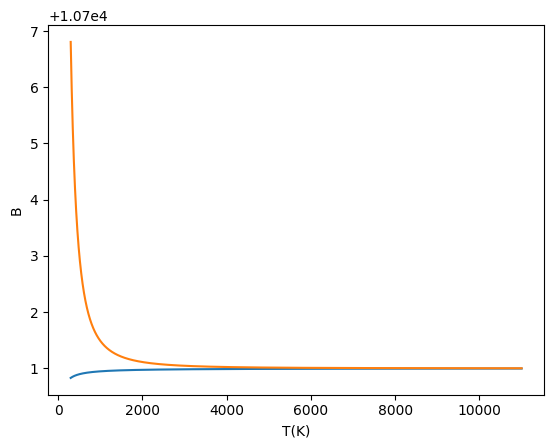

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as ct
import sympy as sym


J = 1 #Factor de escala 
kB = 2 #constante de Boltzmann
T=np.arange(300,11001) #Rango de temperaturas en Kelvin
length = 10701 #cantidad de puntos
h=20 # campo magnético externo en mT


spin=np.array([])
for i in range(length): ## Se crea el array de spines
    if(i==0 or i==length-1):
        spin=np.append(spin,0)
    else:
        spin=np.append(spin,np.random.choice([-1,1]))

H=np.array([])
H=np.append(H,0) #primer hamiltoniano
for i in range(1,length-1): ##se crea el array de Hamiltonianos por cada spin
    H = np.append(H,-J*((spin[i]*spin[i+1]))) 
H=np.append(H,0) #ultimo hamiltoninano

#se calcula la magnetización dependiendo de T y del hamiltoniano. Esta función no tiene en cuenta campo magnético externo
M=np.array([])
for i in range(len(T)):
    B=1/(kB*T[i])
    z=np.sum(np.exp(-B*H))
    M=np.append(M,z)

Hext=np.array([]) #Hamiltoniano con campo magnético externo h
Hext=np.append(Hext,0) #primer hamiltoniano
for i in range(1,length-1): ##se crea el array de Hamiltonianos por cada spin
    Hext = np.append(Hext,-J*(spin[i]*spin[i+1]) + h*spin[i]) 
Hext=np.append(Hext,0) #ultimo hamiltoninano

#se calcula la magnetización dependiendo de T y del hamiltoniano. Esta función tiene en cuenta campo magnético externo
N=np.array([])
for i in range(len(T)):
    B=1/(kB*T[i])
    z=np.sum(np.exp(-B*Hext))
    N=np.append(N,z)
plt.ylabel("B") #debido a la naturaleza aleatoria de la asignación de los espines, puede que las figuras no salgan como debería según la teoría
plt.xlabel("T(K)")
plt.plot(T, M)
plt.plot(T, N)
plt.show()

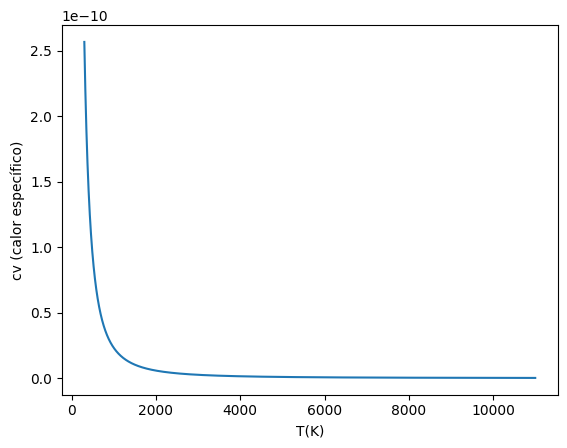

In [2]:
 #Valor esperado del Hamiltoniano
E= np.sum(H*M)/np.sum(M)


 #valor esperado del cuadrado del Hamiltoniano
x2=np.sum((H**2)*M)
y=np.sum(M)
E2= x2/y


cv=np.array([]) #matrices de calores específicos
for i in range(len(T)):
    B=1/(kB*T[i])
    N=len(T)
    A=(B**2/N)*(E2-E)
    cv=np.append(cv,A)
plt.ylabel("cv (calor específico)") 
plt.xlabel("T(K)")
plt.plot(T, cv)
plt.show()

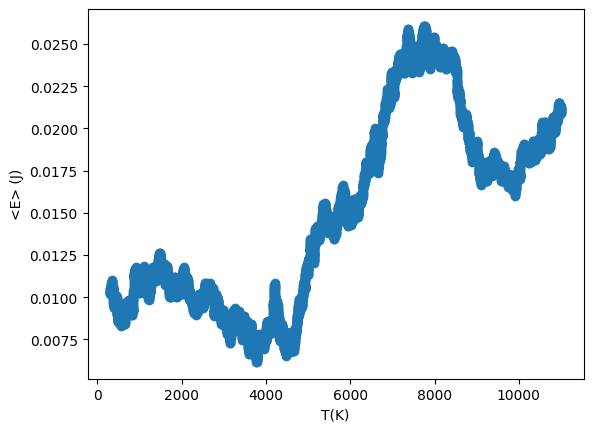

In [4]:
W=np.array([])
for i in range(len(T)):
    A+=H[i]*M[i]
    W=np.append(W,A/np.sum(M))

plt.ylabel("<E> (J)") 
plt.xlabel("T(K)")
plt.scatter(T, W)
plt.show()